Часть 1. EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv ('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
#7043 абонента, 21 признак.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Пропусков в данных нет. Целевая переменная - churn (отток пользователя телекоммуникационной компании: "да" или"нет").
#Также понятно, что целевая переменная не зависит от customerID. Поэтому ее можно убрать.

In [7]:
df = df.drop(["customerID"], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
#Посмотрим на распределение признаков по целевой переменной.

In [9]:
pd.crosstab(df['Churn'], df['gender'], margins=True)

gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


<AxesSubplot:xlabel='gender', ylabel='count'>

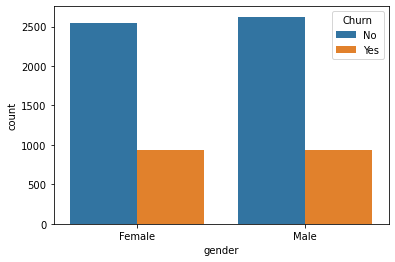

In [10]:
sns.countplot(x='gender', hue='Churn', data=df)

In [11]:
#Как можем видеть, от пола количество ушедших и оставшихся абонентов не зависит. Поэтому данный признак можно удалить. 

In [12]:
df = df.drop(["gender"], axis = 1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
pd.crosstab(df['Churn'], df['SeniorCitizen'], margins=True)

SeniorCitizen,0,1,All
Churn,,,
No,4508,666,5174
Yes,1393,476,1869
All,5901,1142,7043


<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

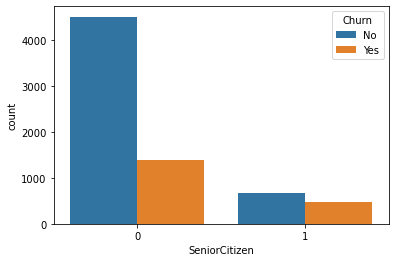

In [14]:
sns.countplot(x='SeniorCitizen',  hue='Churn', data=df)

In [15]:
#большинство клиентов компании не пенсионеры и не склонны к уходу от услуг.Среди пенсионеров доля ушедших уже побольше.

In [16]:
pd.crosstab(df['Churn'], df['Partner'], margins=True)

Partner,No,Yes,All
Churn,,,
No,2441,2733,5174
Yes,1200,669,1869
All,3641,3402,7043


<AxesSubplot:xlabel='Partner', ylabel='count'>

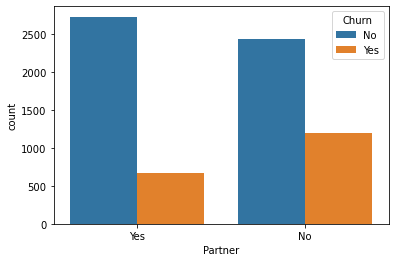

In [17]:
sns.countplot(x='Partner', hue='Churn', data=df)

In [18]:
#При отсутсвии партнера склонность к уходу выше.

In [19]:
pd.crosstab(df['Churn'], df['Dependents'], margins=True)

Dependents,No,Yes,All
Churn,,,
No,3390,1784,5174
Yes,1543,326,1869
All,4933,2110,7043


<AxesSubplot:xlabel='Dependents', ylabel='count'>

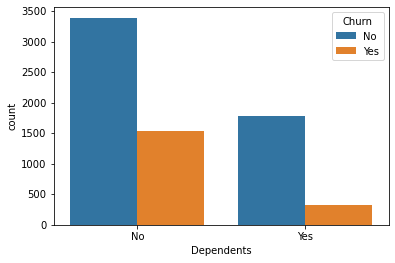

In [20]:
sns.countplot(x='Dependents', hue='Churn', data=df)

In [21]:
#Большинство абонентов не имеют иждивенцов. Имеющие иждевенцев менее склонны от ухода от услуг.

In [22]:
pd.crosstab(df['Churn'], df['PhoneService'], margins=True)

PhoneService,No,Yes,All
Churn,,,
No,512,4662,5174
Yes,170,1699,1869
All,682,6361,7043


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

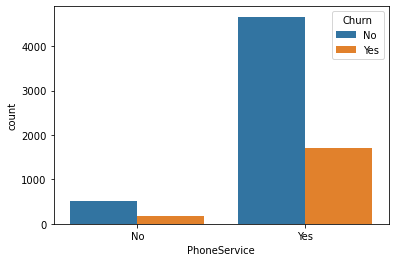

In [23]:
sns.countplot(x='PhoneService', hue='Churn', data=df)

In [24]:
#Большинство клиентов имеют также услуги телефонной связи.

In [25]:
pd.crosstab(df['Churn'], df['MultipleLines'], margins=True)

MultipleLines,No,No phone service,Yes,All
Churn,,,,
No,2541,512,2121,5174
Yes,849,170,850,1869
All,3390,682,2971,7043


<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

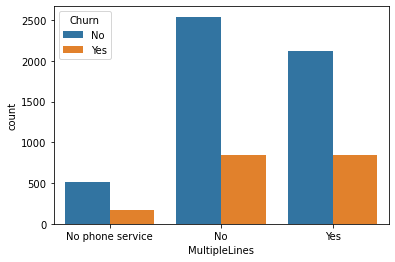

In [26]:
sns.countplot(x='MultipleLines', hue='Churn', data=df)

In [27]:
#Отсюда, во-первых видно, что признак PhoneService также содержится в признаке MultipleLines (No phone service). Поэтому
#от признака PhoneService можно смело избавляться.
#Во-вторых из данных можно сделать вывод, что у большинства абонентов нет мультилинии, 
#а склонность к уходу при наличии или отсутствии мультилинии примерно одинакова.

In [28]:
df = df.drop(["PhoneService"], axis = 1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
pd.crosstab(df['Churn'], df['InternetService'], margins=True)

InternetService,DSL,Fiber optic,No,All
Churn,,,,
No,1962,1799,1413,5174
Yes,459,1297,113,1869
All,2421,3096,1526,7043


<AxesSubplot:xlabel='InternetService', ylabel='count'>

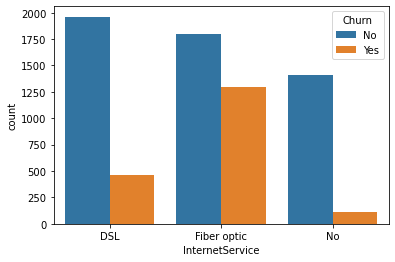

In [30]:
sns.countplot(x='InternetService', hue='Churn', data=df)

In [31]:
#Больше склонны к уходу клиенты, подключенные по Fiber optic.

In [32]:
pd.crosstab(df['Churn'], df['OnlineSecurity'], margins=True)

OnlineSecurity,No,No internet service,Yes,All
Churn,,,,
No,2037,1413,1724,5174
Yes,1461,113,295,1869
All,3498,1526,2019,7043


<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

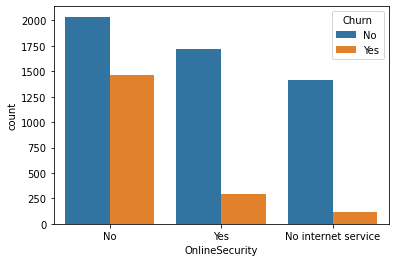

In [33]:
sns.countplot(x='OnlineSecurity', hue='Churn', data=df)

In [34]:
pd.crosstab(df['Churn'], df['OnlineBackup'], margins=True)

OnlineBackup,No,No internet service,Yes,All
Churn,,,,
No,1855,1413,1906,5174
Yes,1233,113,523,1869
All,3088,1526,2429,7043


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

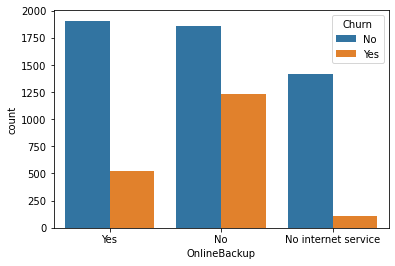

In [35]:
sns.countplot(x='OnlineBackup', hue='Churn', data=df)

In [36]:
pd.crosstab(df['Churn'], df['DeviceProtection'], margins=True)

DeviceProtection,No,No internet service,Yes,All
Churn,,,,
No,1884,1413,1877,5174
Yes,1211,113,545,1869
All,3095,1526,2422,7043


<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

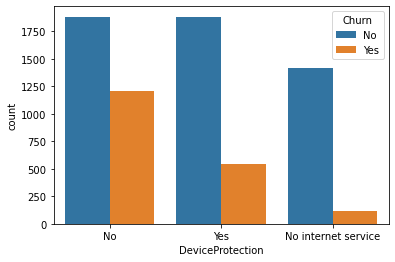

In [37]:
sns.countplot(x='DeviceProtection', hue='Churn', data=df)

In [38]:
pd.crosstab(df['Churn'], df['TechSupport'], margins=True)

TechSupport,No,No internet service,Yes,All
Churn,,,,
No,2027,1413,1734,5174
Yes,1446,113,310,1869
All,3473,1526,2044,7043


<AxesSubplot:xlabel='TechSupport', ylabel='count'>

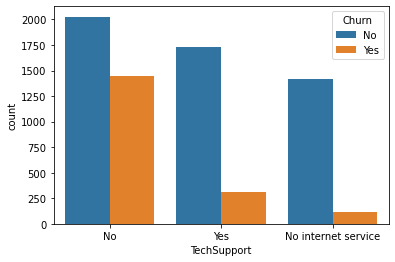

In [39]:
sns.countplot(x='TechSupport', hue='Churn', data=df)

In [40]:
pd.crosstab(df['Churn'], df['StreamingTV'], margins=True)

StreamingTV,No,No internet service,Yes,All
Churn,,,,
No,1868,1413,1893,5174
Yes,942,113,814,1869
All,2810,1526,2707,7043


<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

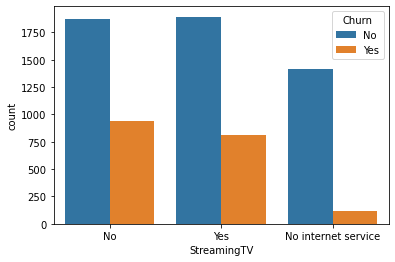

In [41]:
sns.countplot(x='StreamingTV', hue='Churn', data=df)

In [42]:
pd.crosstab(df['Churn'], df['StreamingMovies'], margins=True)

StreamingMovies,No,No internet service,Yes,All
Churn,,,,
No,1847,1413,1914,5174
Yes,938,113,818,1869
All,2785,1526,2732,7043


<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

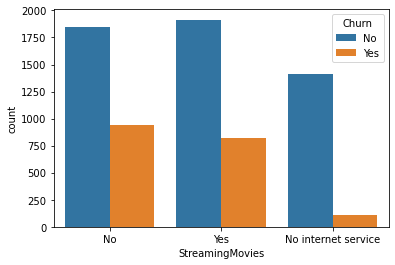

In [43]:
sns.countplot(x='StreamingMovies', hue='Churn', data=df)

In [44]:
#Распределения по цифрам практически аналогичны, поэтому один из признаков можно убрать.

In [45]:
df = df.drop(["StreamingMovies"], axis = 1)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
pd.crosstab(df['Churn'], df['Contract'], margins=True)

Contract,Month-to-month,One year,Two year,All
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
All,3875,1473,1695,7043


<AxesSubplot:xlabel='Contract', ylabel='count'>

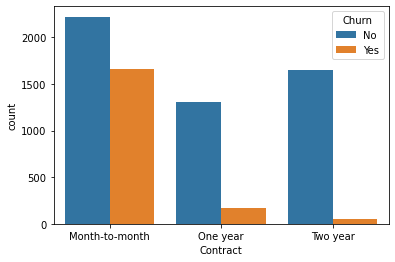

In [47]:
sns.countplot(x='Contract', hue='Churn', data=df)

In [48]:
#Чем на более длительный срок заключен контракт, тем меньше отток клиентов.

In [49]:
pd.crosstab(df['Churn'], df['PaperlessBilling'], margins=True)

PaperlessBilling,No,Yes,All
Churn,,,
No,2403,2771,5174
Yes,469,1400,1869
All,2872,4171,7043


<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

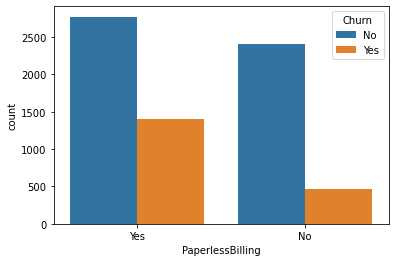

In [50]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)

In [51]:
#Более высокий отток у клиентов, пользующиеся услугой "Безбумажного выставления счетов".

In [52]:
pd.crosstab(df['Churn'], df['PaymentMethod'], margins=True)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
Churn,,,,,
No,1286,1290,1294,1304,5174
Yes,258,232,1071,308,1869
All,1544,1522,2365,1612,7043


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

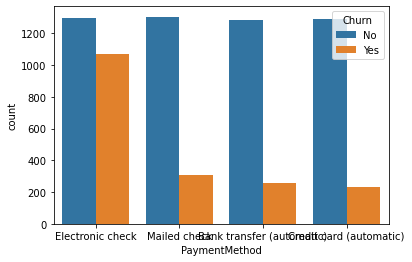

In [53]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)

In [54]:
#Наибольший отток наблюдается у клиентов, получающих электронный чек.

In [55]:
#Также посмотрим на распределение числовых признаков в зависимости от целевого признака.

In [56]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

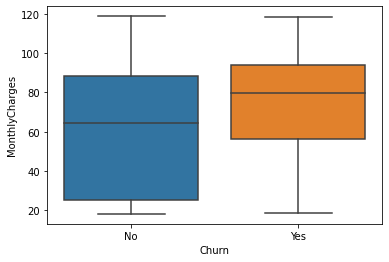

In [57]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")

In [58]:
#Как можно видеть, во-первых количество клиентов отказавшихся от услуг компании меньше, а большая часть отказавшихся 
#в месяц платит от 55 до 90. 

In [59]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [60]:
#Признак 'TotalCharges' имел тип данных object, хоть и по виду там были цифры с плавающей запятой.
#Переводим во float64. Видим, что часть данных, а именно 11 значений потерялось (не могу сказать почему). 
#Причем сработал именно этот метод.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7043 non-null   object 


In [62]:
#Заполним пустые значения средними значениями по столбцу.
df['TotalCharges'] = df['TotalCharges']. fillna(df['TotalCharges'].mean())
df.TotalCharges.isnull().sum()

0

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

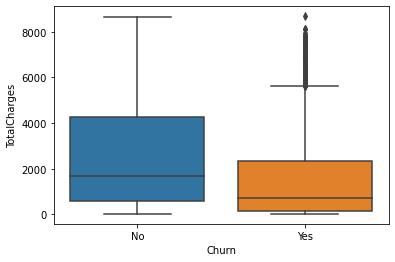

In [63]:
sns.boxplot(data=df, x="Churn", y="TotalCharges")

In [64]:
#Видим, что суммарные траты клиентов верных компании в диапазоне примерно от 100 до 4100. 
#В то время как суммарные траты ушедших от 50 до 2100 со значительным количеством выбросов свыше суммы 6тыс.

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

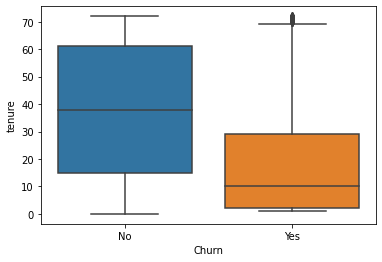

In [65]:
sns.boxplot(data=df, x="Churn", y="tenure")

In [66]:
#Видим, что верные компании клиенты заключают договор сроком от 15 до 60 месяцев, в то время как ушедшие сроком от 5 до 30.

In [67]:
#Далее переведем категориальные переменные в уникальные лейблы. С какими-то столбцами сделаю вручную, для порядка, 
#где-то использую LabelEncoder.  

In [68]:
df_le=df.copy(deep=True)

In [69]:
MultipleLines = {"MultipleLines":     {"No phone service": 0, "No": 1, "Yes": 2}}
df_le = df_le.replace(MultipleLines)

InternetService = {"InternetService":     {"No": 0, "DSL": 1, "Fiber optic": 2}}
df_le = df_le.replace(InternetService)

OnlineSecurity = {"OnlineSecurity":     {"No internet service": 0, "No": 1, "Yes": 2}}
df_le = df_le.replace(OnlineSecurity)

OnlineBackup = {"OnlineBackup":     {"No internet service": 0, "No": 1, "Yes": 2}}
df_le = df_le.replace(OnlineBackup)

DeviceProtection = {"DeviceProtection":     {"No internet service": 0, "No": 1, "Yes": 2}}
df_le = df_le.replace(DeviceProtection)

TechSupport = {"TechSupport":     {"No internet service": 0, "No": 1, "Yes": 2}}
df_le = df_le.replace(TechSupport)

StreamingTV = {"StreamingTV":     {"No internet service": 0, "No": 1, "Yes": 2}}
df_le = df_le.replace(StreamingTV)



In [70]:
from sklearn.preprocessing import LabelEncoder # преобразуем все текстовые данные в численные
labelencoder =  LabelEncoder()

df_le['Partner'] = labelencoder.fit_transform(df_le['Partner'])
df_le['Dependents'] = labelencoder.fit_transform(df_le['Dependents'])
df_le['Contract'] = labelencoder.fit_transform(df_le['Contract'])
df_le['PaperlessBilling'] = labelencoder.fit_transform(df_le['PaperlessBilling'])
df_le['PaymentMethod'] = labelencoder.fit_transform(df_le['PaymentMethod'])
df_le['Churn'] = labelencoder.fit_transform(df_le['Churn'])

In [71]:
df_le.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,1,2,1,1,1,0,1,2,29.85,29.85,0
1,0,0,0,34,1,1,2,1,2,1,1,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,1,2,2,1,1,1,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,2,1,2,2,1,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,2,1,1,1,1,1,0,1,2,70.70,151.65,1


In [72]:
# Выделим фичи и целевую переменную
x = df_le.drop('Churn', axis=1)
y = df_le['Churn']

In [73]:
# Разделим данные на train и test (70/30)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
print ('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 4930
Test cases: 2113


In [74]:
#Sklearn

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier().fit(x_train, y_train)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score
predictions = gbm.predict(x_test)
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.7960246095598675
Overall Precision: 0.7366830266378317
Overall Recall: 0.7118618723049103
Overall f1_score: 0.7220643891708317


In [77]:
print ('Train gbm ROC-AUC =', roc_auc_score(y_train, gbm.predict_proba(x_train)[:,1]))
print ('Test gbm ROC-AUC = ', roc_auc_score(y_test, gbm.predict_proba(x_test)[:,1]))

Train gbm ROC-AUC = 0.8844609488934454
Test gbm ROC-AUC =  0.8388689896601289


In [78]:
#xgboost

In [79]:
!pip install xgboost

In [80]:
from xgboost import XGBClassifier
# create model instance
bst = XGBClassifier()
# fit model
bst.fit(x_train, y_train)
# make predictions
predictions = bst.predict(x_test)

In [81]:
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.791292001893043
Overall Precision: 0.7298422708848629
Overall Recall: 0.70573851254231
Overall f1_score: 0.7156157671098301


In [82]:
print ('Train xgb ROC-AUC =', roc_auc_score(y_train, bst.predict_proba(x_train)[:,1]))
print ('Test xgb ROC-AUC = ', roc_auc_score(y_test, bst.predict_proba(x_test)[:,1]))

Train xgb ROC-AUC = 0.986371599470482
Test xgb ROC-AUC =  0.8198648398015487


In [83]:
#lightgbm

In [84]:
!pip install lightgbm

In [85]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(x_train, y_train)
# make predictions
predictions = clf.predict(x_test)

In [86]:
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.791292001893043
Overall Precision: 0.7300488225685076
Overall Recall: 0.7034039272963324
Overall f1_score: 0.7140884244890946


In [87]:
print ('Train xgb ROC-AUC =', roc_auc_score(y_train, clf.predict_proba(x_train)[:,1]))
print ('Test xgb ROC-AUC = ', roc_auc_score(y_test, clf.predict_proba(x_test)[:,1]))

Train xgb ROC-AUC = 0.9541548781082685
Test xgb ROC-AUC =  0.8318350952844623


In [88]:
#catboost

In [89]:
!pip install catboost

In [90]:
from catboost import CatBoostClassifier 
cbc = CatBoostClassifier()
cbc.fit(x_train, y_train)
# make predictions
predictions = cbc.predict(x_test)

Learning rate set to 0.02036
0:	learn: 0.6783669	total: 153ms	remaining: 2m 32s
1:	learn: 0.6660349	total: 154ms	remaining: 1m 16s
2:	learn: 0.6526018	total: 156ms	remaining: 51.9s
3:	learn: 0.6405555	total: 158ms	remaining: 39.4s
4:	learn: 0.6288743	total: 160ms	remaining: 31.9s
5:	learn: 0.6182017	total: 163ms	remaining: 26.9s
6:	learn: 0.6076835	total: 165ms	remaining: 23.4s
7:	learn: 0.5974070	total: 167ms	remaining: 20.7s
8:	learn: 0.5877826	total: 169ms	remaining: 18.6s
9:	learn: 0.5789804	total: 171ms	remaining: 17s
10:	learn: 0.5704641	total: 174ms	remaining: 15.6s
11:	learn: 0.5626052	total: 176ms	remaining: 14.5s
12:	learn: 0.5551782	total: 178ms	remaining: 13.5s
13:	learn: 0.5483815	total: 181ms	remaining: 12.7s
14:	learn: 0.5418282	total: 183ms	remaining: 12s
15:	learn: 0.5355876	total: 185ms	remaining: 11.4s
16:	learn: 0.5296180	total: 187ms	remaining: 10.8s
17:	learn: 0.5244120	total: 189ms	remaining: 10.3s
18:	learn: 0.5190630	total: 192ms	remaining: 9.9s
19:	learn: 0.51

171:	learn: 0.3875200	total: 513ms	remaining: 2.47s
172:	learn: 0.3874034	total: 515ms	remaining: 2.46s
173:	learn: 0.3871886	total: 518ms	remaining: 2.46s
174:	learn: 0.3869786	total: 521ms	remaining: 2.45s
175:	learn: 0.3868107	total: 523ms	remaining: 2.45s
176:	learn: 0.3866710	total: 526ms	remaining: 2.44s
177:	learn: 0.3864256	total: 529ms	remaining: 2.44s
178:	learn: 0.3862289	total: 532ms	remaining: 2.44s
179:	learn: 0.3860964	total: 535ms	remaining: 2.44s
180:	learn: 0.3858826	total: 537ms	remaining: 2.43s
181:	learn: 0.3858085	total: 540ms	remaining: 2.43s
182:	learn: 0.3855919	total: 543ms	remaining: 2.42s
183:	learn: 0.3854399	total: 546ms	remaining: 2.42s
184:	learn: 0.3852959	total: 549ms	remaining: 2.42s
185:	learn: 0.3851675	total: 551ms	remaining: 2.41s
186:	learn: 0.3850263	total: 554ms	remaining: 2.41s
187:	learn: 0.3848524	total: 557ms	remaining: 2.4s
188:	learn: 0.3847073	total: 559ms	remaining: 2.4s
189:	learn: 0.3845736	total: 562ms	remaining: 2.4s
190:	learn: 0.3

389:	learn: 0.3606345	total: 1.05s	remaining: 1.64s
390:	learn: 0.3605816	total: 1.05s	remaining: 1.64s
391:	learn: 0.3604751	total: 1.05s	remaining: 1.63s
392:	learn: 0.3604055	total: 1.05s	remaining: 1.63s
393:	learn: 0.3602493	total: 1.06s	remaining: 1.63s
394:	learn: 0.3600904	total: 1.06s	remaining: 1.62s
395:	learn: 0.3600241	total: 1.06s	remaining: 1.62s
396:	learn: 0.3599543	total: 1.06s	remaining: 1.62s
397:	learn: 0.3598756	total: 1.07s	remaining: 1.61s
398:	learn: 0.3597343	total: 1.07s	remaining: 1.61s
399:	learn: 0.3596481	total: 1.07s	remaining: 1.61s
400:	learn: 0.3595599	total: 1.07s	remaining: 1.61s
401:	learn: 0.3594657	total: 1.08s	remaining: 1.6s
402:	learn: 0.3593907	total: 1.08s	remaining: 1.6s
403:	learn: 0.3592684	total: 1.08s	remaining: 1.6s
404:	learn: 0.3591118	total: 1.08s	remaining: 1.59s
405:	learn: 0.3590144	total: 1.09s	remaining: 1.59s
406:	learn: 0.3588459	total: 1.09s	remaining: 1.59s
407:	learn: 0.3587212	total: 1.09s	remaining: 1.59s
408:	learn: 0.3

618:	learn: 0.3341922	total: 1.58s	remaining: 975ms
619:	learn: 0.3341234	total: 1.59s	remaining: 973ms
620:	learn: 0.3340576	total: 1.59s	remaining: 970ms
621:	learn: 0.3339327	total: 1.59s	remaining: 967ms
622:	learn: 0.3337887	total: 1.59s	remaining: 964ms
623:	learn: 0.3337334	total: 1.6s	remaining: 962ms
624:	learn: 0.3336682	total: 1.6s	remaining: 959ms
625:	learn: 0.3336025	total: 1.6s	remaining: 957ms
626:	learn: 0.3334953	total: 1.6s	remaining: 954ms
627:	learn: 0.3334175	total: 1.61s	remaining: 952ms
628:	learn: 0.3333495	total: 1.61s	remaining: 949ms
629:	learn: 0.3332146	total: 1.61s	remaining: 946ms
630:	learn: 0.3331115	total: 1.61s	remaining: 944ms
631:	learn: 0.3330739	total: 1.61s	remaining: 941ms
632:	learn: 0.3329757	total: 1.62s	remaining: 938ms
633:	learn: 0.3328723	total: 1.62s	remaining: 935ms
634:	learn: 0.3328231	total: 1.62s	remaining: 933ms
635:	learn: 0.3326607	total: 1.63s	remaining: 930ms
636:	learn: 0.3325285	total: 1.63s	remaining: 927ms
637:	learn: 0.33

776:	learn: 0.3194604	total: 1.94s	remaining: 558ms
777:	learn: 0.3193537	total: 1.95s	remaining: 556ms
778:	learn: 0.3192428	total: 1.95s	remaining: 553ms
779:	learn: 0.3192152	total: 1.95s	remaining: 550ms
780:	learn: 0.3191030	total: 1.95s	remaining: 548ms
781:	learn: 0.3190048	total: 1.96s	remaining: 545ms
782:	learn: 0.3188829	total: 1.96s	remaining: 543ms
783:	learn: 0.3188005	total: 1.96s	remaining: 540ms
784:	learn: 0.3187376	total: 1.96s	remaining: 538ms
785:	learn: 0.3186128	total: 1.97s	remaining: 535ms
786:	learn: 0.3184690	total: 1.97s	remaining: 533ms
787:	learn: 0.3183748	total: 1.97s	remaining: 530ms
788:	learn: 0.3183159	total: 1.97s	remaining: 528ms
789:	learn: 0.3182017	total: 1.98s	remaining: 525ms
790:	learn: 0.3181091	total: 1.98s	remaining: 523ms
791:	learn: 0.3179703	total: 1.98s	remaining: 520ms
792:	learn: 0.3178278	total: 1.98s	remaining: 518ms
793:	learn: 0.3176884	total: 1.99s	remaining: 515ms
794:	learn: 0.3175552	total: 1.99s	remaining: 512ms
795:	learn: 

938:	learn: 0.3049727	total: 2.32s	remaining: 151ms
939:	learn: 0.3048690	total: 2.32s	remaining: 148ms
940:	learn: 0.3047879	total: 2.32s	remaining: 146ms
941:	learn: 0.3046640	total: 2.33s	remaining: 143ms
942:	learn: 0.3045456	total: 2.33s	remaining: 141ms
943:	learn: 0.3044210	total: 2.33s	remaining: 138ms
944:	learn: 0.3043297	total: 2.33s	remaining: 136ms
945:	learn: 0.3042997	total: 2.34s	remaining: 133ms
946:	learn: 0.3042400	total: 2.34s	remaining: 131ms
947:	learn: 0.3041797	total: 2.34s	remaining: 128ms
948:	learn: 0.3040817	total: 2.34s	remaining: 126ms
949:	learn: 0.3040061	total: 2.35s	remaining: 123ms
950:	learn: 0.3038858	total: 2.35s	remaining: 121ms
951:	learn: 0.3038467	total: 2.35s	remaining: 119ms
952:	learn: 0.3037953	total: 2.35s	remaining: 116ms
953:	learn: 0.3036401	total: 2.35s	remaining: 114ms
954:	learn: 0.3036020	total: 2.36s	remaining: 111ms
955:	learn: 0.3034865	total: 2.36s	remaining: 109ms
956:	learn: 0.3034354	total: 2.36s	remaining: 106ms
957:	learn: 

In [91]:
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.7974443918599148
Overall Precision: 0.7386989870465048
Overall Recall: 0.7139907033894375
Overall f1_score: 0.7241823957682698


In [92]:
print ('Train xgb ROC-AUC =', roc_auc_score(y_train, cbc.predict_proba(x_train)[:,1]))
print ('Test xgb ROC-AUC = ', roc_auc_score(y_test, cbc.predict_proba(x_test)[:,1]))

Train xgb ROC-AUC = 0.9362108980106072
Test xgb ROC-AUC =  0.8365355635925256


In [93]:
#Можно сказать, что с небольшим отрывом лидирует catboost. Далее проведем настройку гиперпараметров на кросс-валидации.


In [94]:
#Кросс-валидация для GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [25, 50, 75, 100], 'learning_rate': [0.1,0.5,1], 'max_depth': [1,3,5,8]}
grid_search_gbm = GridSearchCV(gbm, parameters, cv=5, n_jobs=-1)
grid_search_gbm.fit(x_train, y_train)
best_gbm = grid_search_gbm.best_estimator_
grid_search_gbm.best_params_ 

{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 75}

In [95]:
#По дефолту learning_rate: 0,1; max_depth=3; n_estimators=100

In [96]:
gbm_cv = GradientBoostingClassifier(learning_rate=0.5, max_depth=1, n_estimators=75).fit(x_train, y_train)

In [97]:
predictions = gbm_cv.predict(x_test)
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.8035967818267865
Overall Precision: 0.7476282358425816
Overall Recall: 0.7216592479250707
Overall f1_score: 0.7323821844684343


In [98]:
print ('Train gbm ROC-AUC =', roc_auc_score(y_train, gbm_cv.predict_proba(x_train)[:,1]))
print ('Test gbm ROC-AUC = ', roc_auc_score(y_test, gbm_cv.predict_proba(x_test)[:,1]))

Train gbm ROC-AUC = 0.8616123467837841
Test gbm ROC-AUC =  0.8397238837112255


In [103]:
#Кросс-валидация для xgboost
parameters = {'n_estimators': [25, 50, 75, 100], 'learning_rate': [0.1,0.5,1], 'max_depth': [1,3,5,8]}
grid_search_bst = GridSearchCV(bst, parameters, cv=5, n_jobs=-1)
grid_search_bst.fit(x_train, y_train)
best_bst = grid_search_bst.best_estimator_
grid_search_bst.best_params_ 

{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 75}

In [105]:
bst_cv = XGBClassifier(learning_rate=0.5, max_depth=1, n_estimators=75).fit(x_train, y_train)

In [106]:
predictions = bst_cv.predict(x_test)
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.8045433033601515
Overall Precision: 0.7492117284384927
Overall Recall: 0.721716627254602
Overall f1_score: 0.7329599474652633


In [107]:
print ('Train xgb ROC-AUC =', roc_auc_score(y_train, bst_cv.predict_proba(x_train)[:,1]))
print ('Test xgb ROC-AUC = ', roc_auc_score(y_test, bst_cv.predict_proba(x_test)[:,1]))

Train xgb ROC-AUC = 0.8613374322753627
Test xgb ROC-AUC =  0.8400525107803588


In [111]:
#Кросс-валидация для lightGBM
parameters = {'n_estimators': [25, 50, 75, 100], 'learning_rate': [0.1,0.5,1], 'max_depth': [1,3,5,8]}
grid_search_clf = GridSearchCV(clf, parameters, cv=5, n_jobs=-1)
grid_search_clf.fit(x_train, y_train)
best_clf = grid_search_clf.best_estimator_
grid_search_clf.best_params_ 

{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 75}

In [113]:
clf_cv = LGBMClassifier(learning_rate=0.5, max_depth=1, n_estimators=75).fit(x_train, y_train)

In [114]:
predictions = clf_cv.predict(x_test)
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.8026502602934217
Overall Precision: 0.7466699966699967
Overall Recall: 0.718099990726573
Overall f1_score: 0.7296482381223411


In [116]:
print ('Train xgb ROC-AUC =', roc_auc_score(y_train, clf_cv.predict_proba(x_train)[:,1]))
print ('Test xgb ROC-AUC = ', roc_auc_score(y_test, clf_cv.predict_proba(x_test)[:,1]))

Train xgb ROC-AUC = 0.8602898135080901
Test xgb ROC-AUC =  0.840276811795799


In [117]:
#Кросс-валидация для catboost cbc = CatBoostClassifier()
parameters = {'n_estimators': [25, 50, 75, 100], 'learning_rate': [0.1,0.5,1], 'max_depth': [1,3,5,8]}
grid_search_cbc = GridSearchCV(cbc, parameters, cv=5, n_jobs=-1)
grid_search_cbc.fit(x_train, y_train)
best_cbc = grid_search_cbc.best_estimator_
grid_search_cbc.best_params_ 

0:	learn: 0.6560611	total: 924us	remaining: 91.5ms
1:	learn: 0.6259375	total: 2.06ms	remaining: 101ms
2:	learn: 0.5986354	total: 2.88ms	remaining: 93.1ms
3:	learn: 0.5778923	total: 3.74ms	remaining: 89.9ms
4:	learn: 0.5591626	total: 4.48ms	remaining: 85.2ms
5:	learn: 0.5437914	total: 5.29ms	remaining: 82.9ms
6:	learn: 0.5284455	total: 6.12ms	remaining: 81.2ms
7:	learn: 0.5166628	total: 6.98ms	remaining: 80.3ms
8:	learn: 0.5044122	total: 7.79ms	remaining: 78.7ms
9:	learn: 0.4937672	total: 8.59ms	remaining: 77.3ms
10:	learn: 0.4850915	total: 9.46ms	remaining: 76.6ms
11:	learn: 0.4786584	total: 10.4ms	remaining: 76.5ms
12:	learn: 0.4717492	total: 11.2ms	remaining: 75.2ms
13:	learn: 0.4659052	total: 12ms	remaining: 74ms
14:	learn: 0.4607009	total: 12.9ms	remaining: 73.1ms
15:	learn: 0.4572294	total: 13.7ms	remaining: 72.1ms
16:	learn: 0.4523197	total: 14.6ms	remaining: 71ms
17:	learn: 0.4484017	total: 15.4ms	remaining: 70.2ms
18:	learn: 0.4446529	total: 16.3ms	remaining: 69.4ms
19:	learn: 

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [118]:
cbc_cv = CatBoostClassifier(learning_rate=0.1, max_depth=3, n_estimators=100).fit(x_train, y_train)

0:	learn: 0.6560611	total: 732us	remaining: 72.5ms
1:	learn: 0.6259375	total: 1.74ms	remaining: 85.2ms
2:	learn: 0.5986354	total: 2.46ms	remaining: 79.5ms
3:	learn: 0.5778923	total: 3.19ms	remaining: 76.6ms
4:	learn: 0.5591626	total: 3.95ms	remaining: 75.1ms
5:	learn: 0.5437914	total: 4.7ms	remaining: 73.7ms
6:	learn: 0.5284455	total: 5.64ms	remaining: 74.9ms
7:	learn: 0.5166628	total: 6.51ms	remaining: 74.9ms
8:	learn: 0.5044122	total: 7.45ms	remaining: 75.4ms
9:	learn: 0.4937672	total: 8.22ms	remaining: 73.9ms
10:	learn: 0.4850915	total: 9.05ms	remaining: 73.3ms
11:	learn: 0.4786584	total: 9.82ms	remaining: 72ms
12:	learn: 0.4717492	total: 10.7ms	remaining: 71.7ms
13:	learn: 0.4659052	total: 11.6ms	remaining: 71.1ms
14:	learn: 0.4607009	total: 12.4ms	remaining: 70ms
15:	learn: 0.4572294	total: 13.1ms	remaining: 68.8ms
16:	learn: 0.4523197	total: 13.9ms	remaining: 67.6ms
17:	learn: 0.4484017	total: 14.6ms	remaining: 66.5ms
18:	learn: 0.4446529	total: 15.4ms	remaining: 65.5ms
19:	learn

In [119]:
predictions = cbc_cv.predict(x_test)
# Метрики качества
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall f1_score:",f1_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.8054898248935163
Overall Precision: 0.7519119494486752
Overall Recall: 0.7171048360921779
Overall f1_score: 0.7306128564263055


In [120]:
print ('Train xgb ROC-AUC =', roc_auc_score(y_train, cbc_cv.predict_proba(x_train)[:,1]))
print ('Test xgb ROC-AUC = ', roc_auc_score(y_test, cbc_cv.predict_proba(x_test)[:,1]))

Train xgb ROC-AUC = 0.862363078907928
Test xgb ROC-AUC =  0.8404483701952056


Выводы: в целом, на данном датасете все варианты градиентного бустинга показывают высокие результаты. В лидерах Catboost,
как без настройки гиперпараметров, так и после настройки (базовые: количество итераций, глубина деревьев, learning rate)